# Optical Character Recognition of Arabic Characters

Classifiying Arabic characters. For more details please visit [this link](https://www.kaggle.com/mloey1/ahdd1)

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Loading training dataset

In [2]:
# load training data
x_train = pd.read_csv('./dataset/csvTrainImages 13440x1024.csv')
print("Training images")
x_train.head()

# load training labels
y_train = pd.read_csv('./dataset/csvTrainLabel 13440x1.csv')
print("Training labels")
y_train.head()

# convert x_train dataframe to numpy ndarray and transpose each image using swapaxes.
x_train = x_train.values.reshape([-1,32,32]).swapaxes(1,2)

# convert y_train dataframe to numpy ndarray and remove all extra dimensions.
y_train = y_train.values.squeeze()

Training images
Training labels


### Loading test dataset

In [3]:
valid_test_split = 0.5

# load test data
x_test = pd.read_csv('./dataset/csvTestImages 3360x1024.csv')
x_test.head()
x_test = x_test.values.reshape([-1,32,32]).swapaxes(1,2)

# load test labels
y_test = pd.read_csv('./dataset/csvTestLabel 3360x1.csv')
y_test.head()
y_test = y_test.values.squeeze()

### Creating validation and test splits of the test set

In [4]:
m_test = y_test.shape[0]
x_val = x_test[ : int(m_test * valid_test_split) ]
x_test = x_test[ int(m_test * valid_test_split) : ]

y_val = y_test[ : int(m_test * valid_test_split) ]
y_test = y_test[ int(m_test * valid_test_split) : ]

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)

print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


x_train shape: (13439, 32, 32)
x_val shape: (1679, 32, 32)
x_test shape: (1680, 32, 32)
y_train shape: (13439,)
y_val shape: (1679,)
y_test shape: (1680,)


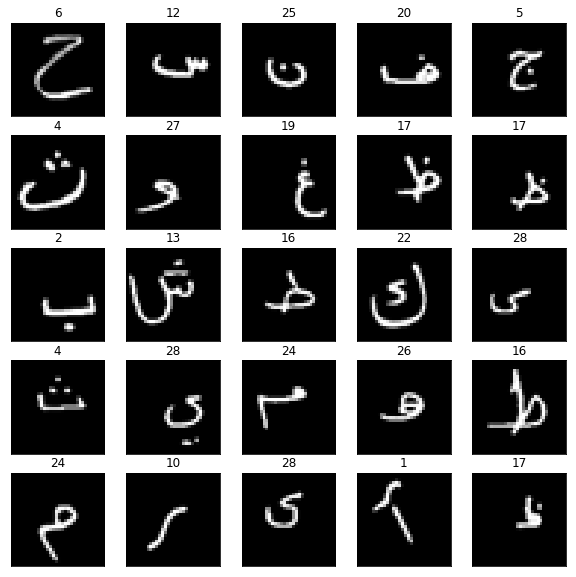

In [5]:
fig = plt.figure(0, figsize=(10,10))
indices = np.random.randint(0, y_train.shape[0], size=25)


for i, idx in enumerate(indices):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(str(y_train[idx]))
    plt.xticks([])
    plt.yticks([])
plt.show()

### Preprcoessing

In [6]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [7]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
y_train = one_hot.fit_transform(y_train[:, None]).toarray()
y_val = one_hot.fit_transform(y_val[:, None]).toarray()
y_test = one_hot.fit_transform(y_test[:, None]).toarray()

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(13439, 28)
(1679, 28)
(1680, 28)


### Building the classification model

In [8]:
import tensorflow as tf
from tensorflow.contrib.layers import batch_norm, conv2d, dropout, flatten, max_pool2d, fully_connected

/home/osama/anaconda3/envs/arabic-ocr/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/osama/anaconda3/envs/arabic-ocr/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/osama/anaconda3/envs/arabic-ocr/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:473: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/osama/anaconda3/envs/arabic-ocr

In [14]:
x = tf.placeholder(tf.float32, shape=[None, 32, 32, 1], name='inputs')
y = tf.placeholder(tf.float32, shape=[None, 28], name='labels')
bsize = tf.placeholder(tf.float32, shape=[1], name='batchSize')

# after convolution the shape will be 32 x 32 x 16
conv1 = conv2d(x, 16, 7, stride=2, padding='same', activation_fn=tf.nn.relu)
# after maxpooling, the shape will be 16 x 16 x 16
maxpool1 = max_pool2d(conv1, 2, stride=2)

# after convolution the shape will be 16 x 16 x 32
conv2 = conv2d(maxpool1, 32, 5, stride=2, padding='same', activation_fn=tf.nn.relu)
# after maxpooling, the shape will be 8 x 8 x 32
maxpool2 = max_pool2d(conv2, 2, stride=2)

# after convolution the shape will be 8 x 8 x 64
conv3 = conv2d(maxpool2, 32, 3, stride=1, padding='same', activation_fn=tf.nn.relu)
# after maxpooling, the shape will be 4 x 4 x 64
maxpool3 = max_pool2d(conv3, 2, stride=2)

flattened = tf.reshape(maxpool3, [bsize, -1])
fc1 = fully_connected(flattened, 512, activation_fn = tf.nn.relu)
logits = fully_connected(fc1, 28, activation_fn=None)
output = tf.nn.softmax(logits)

loss = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
op = tf.train.AdamOptimizer().minimize(loss)

TypeError: List of Tensors when single Tensor expected

### Training Phase

In [ ]:
# training code here